# 覆盖率性能的仿真

## 覆盖率与信道衰减系数的关系

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from udntools.channel import BaseChannel
from udntools.region import ServiceRegion
from udntools.utils import cdf_y_axis
from udntools.utils import pc_gaussian_ue
from udntools.utils import pc_uniform_ue

In [2]:
# 基本参数设定

# 区域的基本属性
service_region = ServiceRegion(0, 100,    
                               0, 100,    
                               100, 10000, 
                               ue_distribution="uniform",
                               ue_sigma=5.0,
                               if_fix_bs=False)

channel = BaseChannel(4.0)

# 设定仿真的信干比区间
x_axis = np.arange(-10, 20.5, 0.5)

# 定义颜色
color = ['r', 'g', 'b']

In [3]:
#######################################################################
########                                                        #######
########            service_region.sigma = 3.0的情况             #######
########                                                        #######
#######################################################################

service_region.bs_position_ = np.loadtxt("bs_position_.txt")
service_region.set_ue_distribution("gaussian")
#service_region.set_ue_sigma(3.0)

# 对覆盖率仿真
sir_user_sim_3 =10 * np.log10(
                 channel.sir_vector(service_region.bs_position_,
                                    service_region.ue_position_))
cdf_nbs_3 = cdf_y_axis(x_axis, sir_user_sim_3)

# 覆盖率的理论数值
pc_nbs_3 = pc_gaussian_ue(x_axis, 0.01, 4.0, 3.0)


#######################################################################
########                                                        #######
########            service_region.sigma = 5.0的情况             #######
########                                                        #######
#######################################################################

service_region.set_ue_distribution("gaussian")
service_region.set_ue_sigma(5.0)

# 对覆盖率仿真
sir_user_sim_5 =10 * np.log10(
                  channel.sir_vector(service_region.bs_position_,
                                     service_region.ue_position_))
cdf_nbs_5 = cdf_y_axis(x_axis, sir_user_sim_5)

# 覆盖率的理论数值
pc_nbs_5 = pc_gaussian_ue(x_axis, 0.01, 4.0, 5.0)

#######################################################################
########                                                        #######
########            service_region.sigma = 10.0的情况            #######
########                                                        #######
#######################################################################

service_region.set_ue_distribution("gaussian")
service_region.set_ue_sigma(10.0)

# 对覆盖率仿真
sir_user_sim_10 =10 * np.log10(
                   channel.sir_vector(service_region.bs_position_,
                                      service_region.ue_position_))
cdf_nbs_10 = cdf_y_axis(x_axis, sir_user_sim_10)

# 覆盖率的理论数值
pc_nbs_10 = pc_gaussian_ue(x_axis, 0.01, 4.0, 10.0)

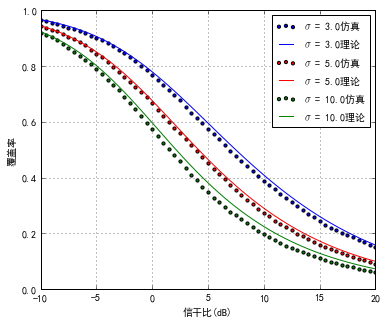

In [4]:
# 画图

# 图片大小
fig = plt.figure(figsize=(6, 5))

f5_theory, = plt.plot(x_axis, pc_nbs_5, color[0])
f5_sim = plt.scatter(x_axis, 1 - cdf_nbs_5, c=color[0], s = 10)

f10_theory, = plt.plot(x_axis, pc_nbs_10, color[1])
f10_sim = plt.scatter(x_axis, 1 - cdf_nbs_10, c=color[1], s = 10)

f3_theory, = plt.plot(x_axis, pc_nbs_3, color[2])
f3_sim = plt.scatter(x_axis, 1 - cdf_nbs_3, c=color[2], s = 10)

plt.xlim(-10, 20)
plt.ylim(0,1)
plt.grid(True)


# 加图例

# 使能中文字体
# -*- coding:utf-8 -*-
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.legend(handles=[f3_sim,
                    f3_theory,
                    f5_sim,
                    f5_theory,
                    f10_sim,
                    f10_theory], 
           labels=["$\sigma$ = 3.0仿真",
                   "$\sigma$ = 3.0理论",
                   "$\sigma$ = 5.0仿真",
                   "$\sigma$ = 5.0理论",
                   "$\sigma$ = 10.0仿真",
                   "$\sigma$ = 10.0理论"], 
           loc='best',
           prop={'size': 10})

# 加坐标轴标签
plt.xlabel("信干比(dB)",fontproperties = 'SimHei', size=13)
plt.ylabel("覆盖率",fontproperties = 'SimHei', size=13)
# 存储成为pdf
fig.savefig('pc_sigma.pdf')
fig.savefig('pc_sigma.png')

plt.show()